In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# -------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
customer_final = pd.read_csv('/Users/rosana/Desktop/customer_final.csv')
customer_final.head(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0,2017,3,0,0,0,0,0.0,0,0


### Fase 2: Visualizacion

#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [6]:
# Agrupamos por mes, el total de billetes reservados:
month_flights = customer_final.groupby('month')['flights_booked'].sum().reset_index()

month_flights

,month,flights_booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


Para representar el número de vuelos reservados por mes usaré un gráfico de barras con Seaborn:

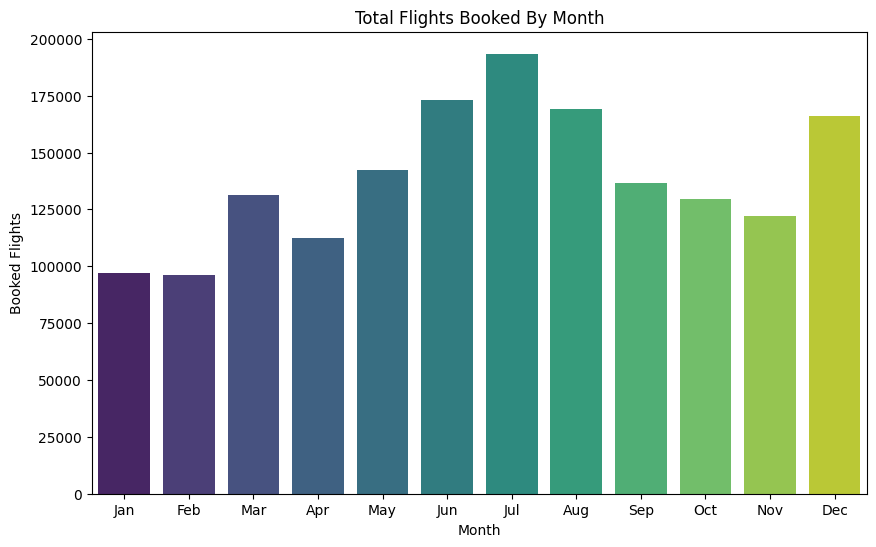

In [24]:

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='flights_booked', data=month_flights, palette='viridis')

# Reemplazar los números de los meses por sus nombres
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months)

# Añadir etiquetas y título
plt.xlabel('Month')
plt.ylabel('Booked Flights')
plt.title('Total Flights Booked By Month')

# Mostrar el gráfico
plt.show()


El mes con más vuelos reservados es Julio y el que menos Febrero.

#### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Para identificar la correlación entre dos variables utilizaré un gráfico de dispersión; ya que permite visualizar fácilmente la relación entre ellas.

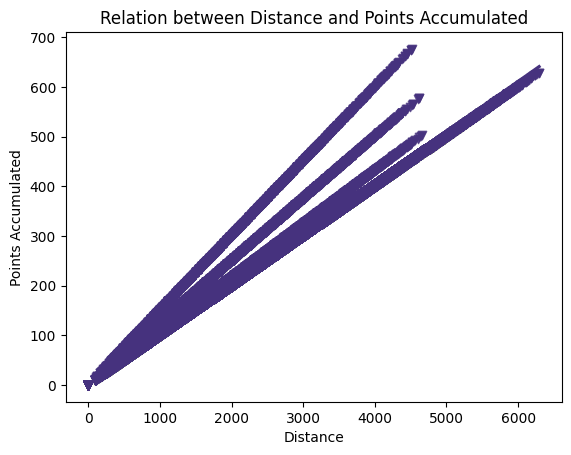

In [28]:
sns.regplot(x='distance',
            y='points_accumulated',
            data = customer_final,
            color=sns.color_palette("viridis")[0],  # Primer color de la paleta viridis',
            marker = 'v')

plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.title('Relation between Distance and Points Accumulated');

Observando la gráfica podemos ver que tienen una correlación positiva; ya que, a medida que la distancia crece, la cantidad de puntos acumulados también es mayor.

Ahora calcularé la medida de correlación para comprobar que lo que nos muestra el gráfico tiene sentido, y para ello usaré el método `corr()` ; que calcula la coeficiente de correlación de Pearson entre las columnas de un DataFrame.

Este coeficiente puede tomar valores entre -1 y 1:
- 1 indica una correlación perfecta positiva: cuando una variable aumenta, la otra también aumenta de manera proporcional.
- -1 indica una correlación perfecta negativa: cuando una variable aumenta, la otra disminuye de manera proporcional.
- 0 indica ausencia de correlación: no hay una relación lineal entre las dos variables.


In [ ]:
correlation = customer_final['distance'].corr(customer_final['points_accumulated'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: 0.9945458005650502


El coeficiente de relación es muy próximo a 1, lo que demuestra que las dos variables tienen una correlación positiva fuerte. Esto quiere decir que cuando una variable aumenta, la otra también aumenta de manera proporcional.

#### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [19]:
# Agrupamos a los clientes por provincia:

province = customer_final.groupby('province')['loyalty_number'].count().reset_index()

province

,province,loyalty_number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


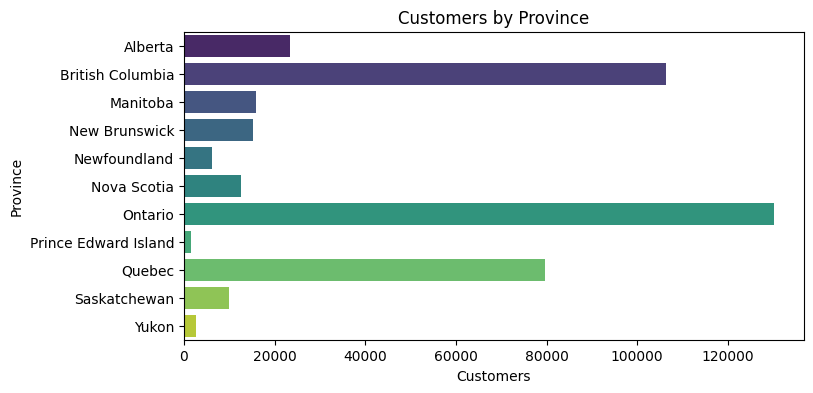

In [42]:
# Gráfico de barras horizontal
plt.figure(figsize=(8, 4))
sns.barplot(x='loyalty_number', y='province', data=province, palette='viridis')

# Mejorar la presentación
plt.xlabel('Customers')
plt.ylabel('Province')
plt.title('Customers by Province')

# Mostrar el gráfico
plt.show()


Estos datos nos proporcionan una visión de la distribución de clientes por provincia en un contexto geográfico. 
- Las provincias con mayor población y mayor urbanización (como Ontario, British Columbia y Quebec) tienen una mayor base de clientes, mientras que las provincias con menor población, como Prince Edward Island, tienen una base de clientes mucho más pequeña.

Todo esto se puede observar, sin ninguna dificultad, en el gráfico.

#### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
# Calculo el salario promedio de cada nivel educativo:

salary_by_education = round(customer_final.groupby('education')['salary'].mean().reset_index(),2) 
salary_by_education

,education,salary
0,Bachelor,72599.08
1,College,79359.34
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


Usaré un gráfico de barras, por que me parece la opción más clara y directa para mostrar las diferencias entre estos valores.

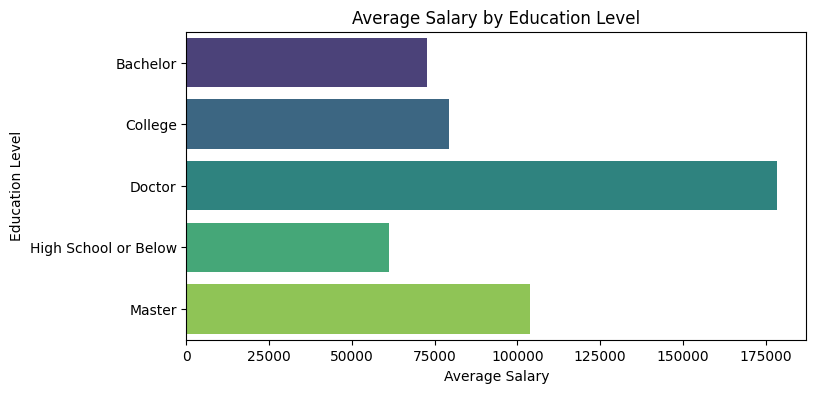

In [ ]:

plt.figure(figsize=(8, 4))
sns.barplot(x='salary', y='education', data=salary_by_education, palette='viridis')

# Añadir título y etiquetas
plt.title('Average Salary by Education Level')
plt.xlabel('Average Salary')
plt.ylabel('Education Level')

# Mostrar el gráfico
plt.show()

En este gráfico podemos observar que:

- El nivel de educación más bajo (High School or Below) tiene el salario promedio más bajo,lo cual es consistente con la idea de que los trabajos que requieren un nivel educativo más bajo suelen tener salarios más bajos.

- El Doctorado tiene el salario promedio más alto lo que refleja que los estudios de posgrado, especialmente en campos de alta demanda o especialización, suelen estar asociados con salarios más altos.

- Los niveles de educación intermedios (Bachelor, College, Master) tienen salarios promedio más cercanos entre sí y están alineados con la idea de que los estudios de grado y maestría tienden a generar salarios relativamente altos, pero no tan elevados como los de un doctorado.

#### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [43]:
# Compruebo los valores únicos de 'Loyalty Card' para conocer cuáles son y cuántos hay:
customer_final['loyalty_card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [48]:
# Agrupo nuestros datos según el tipo de tarjeta de fidelización:

loyalty_cards = customer_final.groupby('loyalty_card')['loyalty_number'].count().reset_index()

loyalty_cards

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


Una buena manera de visualizar estos datos es usando un gráfico de pastel (pie chart), que nos permitirá ver cómo se distribuyen los clientes entre las diferentes categorías.

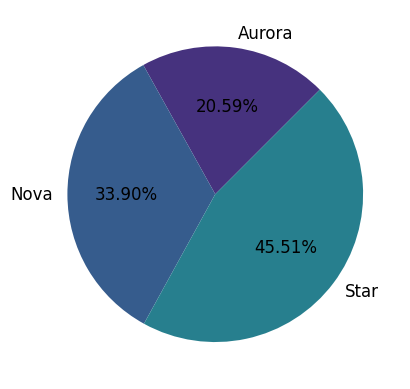

In [51]:
plt.pie('loyalty_number', 
        labels='loyalty_card',
        data = loyalty_cards,
        autopct = '%.2f%%',
        colors=sns.color_palette('viridis'),
        textprops={'fontsize':12},
        startangle=45);

Parece que la tarjeta Star es la más popular o tiene la mayor aceptación entre los clientes, lo que podría sugerir que ofrece beneficios más atractivos o tiene un alcance más amplio en términos de marketing o promociones.

#### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [52]:
marital_status_gender = customer_final.groupby(['gender', 'marital_status'])['loyalty_number'].count().reset_index()

marital_status_gender

,gender,marital_status,loyalty_number
0,Female,Divorced,30634
1,Female,Married,117363
2,Female,Single,54760
3,Male,Divorced,30128
4,Male,Married,117482
5,Male,Single,53393


Realizaré un gráfico de barras, donde podrán verse claramente las diferencias entre las categorías de cada grupo.

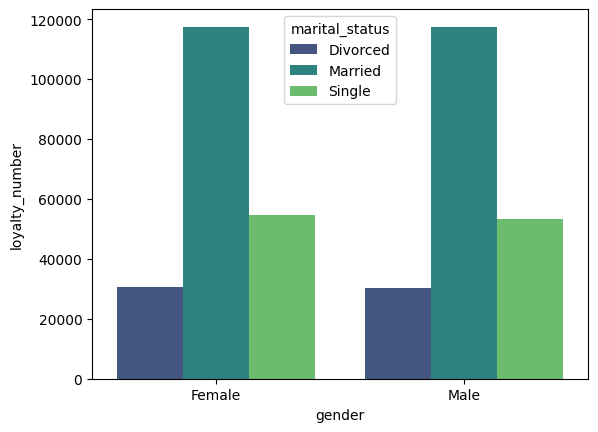

In [54]:
sns.barplot(
    data=marital_status_gender, 
    x='gender', 
    y='loyalty_number', 
    hue='marital_status',  # Le determinamos cómo se debe agrupar
    palette='viridis'
);

Número de clientes según estado civil:

- Married (Casados): Tanto para hombres como para mujeres, la categoría casados tiene el mayor número de clientes.

- Single (Solteros): representan una proporción considerable de los clientes, pero son menos numerosos que los casados.

- Divorced (Divorciados): El número de divorciados es el menor en ambas categorías, es el que tiene menor representación.

Distribución de clientes en cada estado civil:

- Las mujeres casadas representan el mayor grupo de clientes, seguido por las mujeres solteras y luego las mujeres divorciadas.

- Los hombres casados son el grupo más grande, seguidos por los hombres solteros y los hombres divorciados.

Aunque las diferencias son grandes según el estado civil de los clientes, no lo son si comparamos según el género.
